In [39]:
import gzip
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = 'trump.gz'

# Initialize counters and lists
category_counter = Counter()
channel_counter = Counter()
feature_data = []
upload_dates = []

# Open and read the .gz file
i = 0
with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for line in f:
        data = json.loads(line)
        
        # Count categories
        category_counter[data['categories']] += 1
        
        # Count channels
        channel_counter[data['channel_id']] += 1
        
        # Collect feature data
        feature_data.append({
            'channel_id': data.get('channel_id', ''),
            'like_count': data.get('like_count', 0),
            'dislike_count': data.get('dislike_count', 0),
            'view_count': data.get('view_count', 0),
            'duration': data.get('duration', 0),
            'upload_date': data.get('upload_date', '')
        })
        
        
        # Collect upload dates
        upload_dates.append(data.get('upload_date', ''))
        
        i += 1

# Create DataFrame for feature analysis
feature_df = pd.DataFrame(feature_data)

In [3]:
# Display basic statistics and overview
print("Total number of entries processed:", i)
print("\nCategory distribution (top 10 categories):")
print(category_counter.most_common(10))

print("\nNumber of unique channels:", len(channel_counter))
print("\nBasic statistics for numeric features (likes, dislikes, views, duration):")
print(feature_df.describe())


Total number of entries processed: 447616

Category distribution (top 10 categories):
[('News & Politics', 308326), ('Entertainment', 44392), ('People & Blogs', 39932), ('Education', 11766), ('Comedy', 9971), ('Gaming', 9169), ('Nonprofits & Activism', 5019), ('Sports', 4650), ('Music', 3573), ('Film & Animation', 3401)]

Number of unique channels: 14638

Basic statistics for numeric features (likes, dislikes, views, duration):
         like_count  dislike_count    view_count       duration
count  4.418320e+05   4.418320e+05  4.475840e+05  447616.000000
mean   1.138640e+03   1.188766e+02  6.295207e+04     767.199425
std    1.031961e+04   6.911896e+03  7.874224e+05    2071.631538
min    0.000000e+00   0.000000e+00  0.000000e+00       1.000000
25%    1.300000e+01   2.000000e+00  7.270000e+02     134.000000
50%    7.900000e+01   9.000000e+00  4.072000e+03     283.000000
75%    5.040000e+02   4.200000e+01  2.150600e+04     622.000000
max    2.864436e+06   4.506614e+06  2.542660e+08   43029

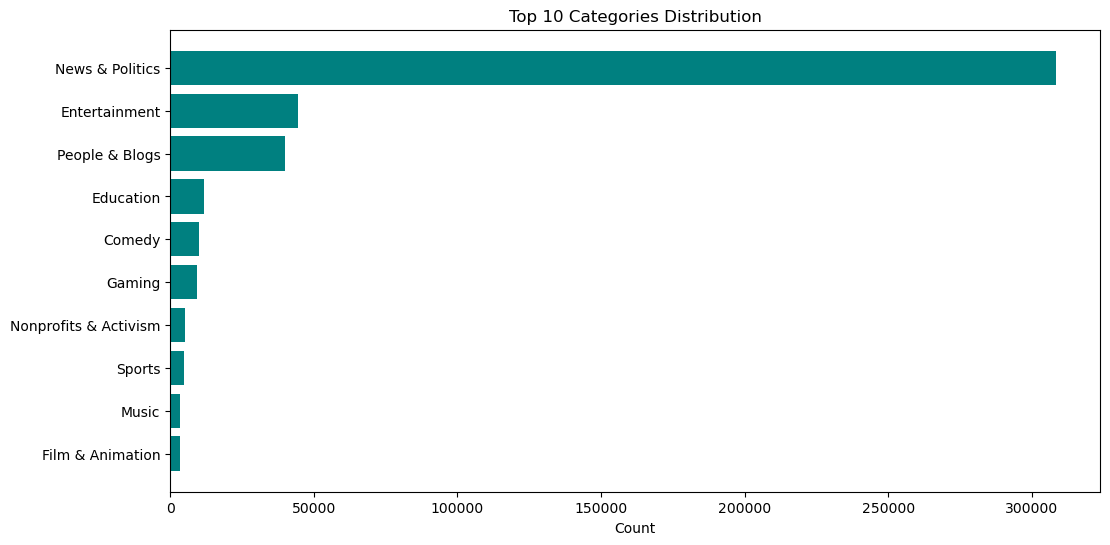

In [4]:
# Visualize category distribution
top_categories = category_counter.most_common(10)
categories, counts = zip(*top_categories)

plt.figure(figsize=(12, 6))
plt.barh(categories, counts, color='teal')
plt.xlabel('Count')
plt.title('Top 10 Categories Distribution')
plt.gca().invert_yaxis()
plt.show()


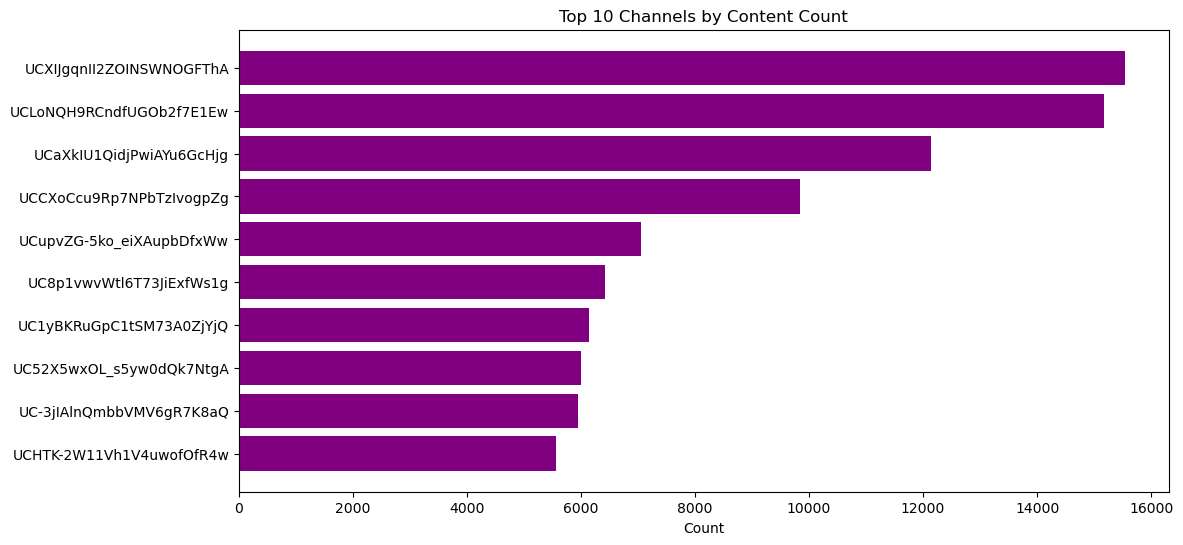

In [5]:
# Top channels by content count
top_channels = channel_counter.most_common(10)
channels, counts = zip(*top_channels)

plt.figure(figsize=(12, 6))
plt.barh(channels, counts, color='purple')
plt.xlabel('Count')
plt.title('Top 10 Channels by Content Count')
plt.gca().invert_yaxis()
plt.show()


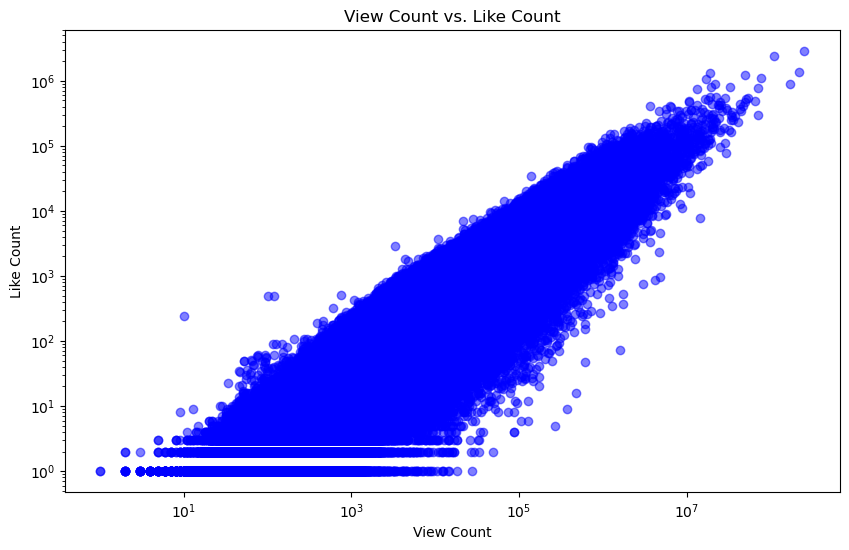

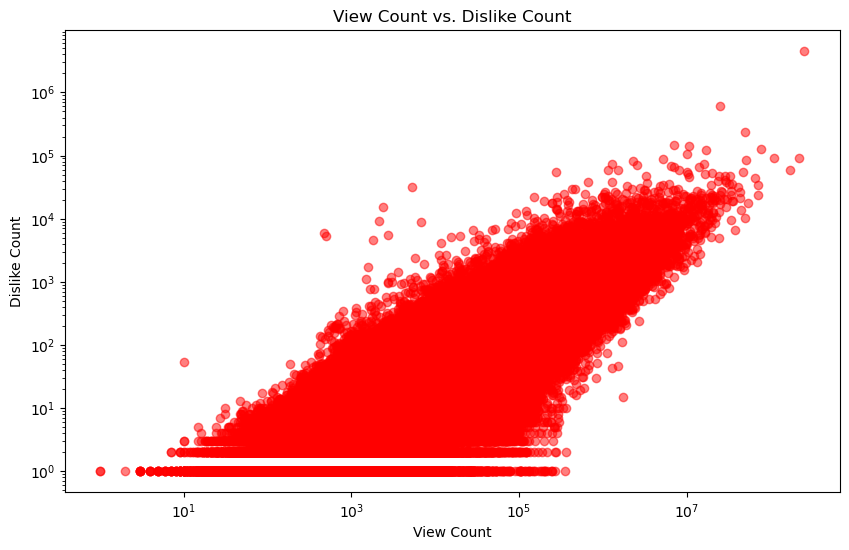

In [6]:
# Scatter plot of view count vs likes
plt.figure(figsize=(10, 6))
plt.scatter(feature_df['view_count'], feature_df['like_count'], alpha=0.5, c='blue')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.title('View Count vs. Like Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Scatter plot of view count vs dislikes
plt.figure(figsize=(10, 6))
plt.scatter(feature_df['view_count'], feature_df['dislike_count'], alpha=0.5, c='red')
plt.xlabel('View Count')
plt.ylabel('Dislike Count')
plt.title('View Count vs. Dislike Count')
plt.xscale('log')
plt.yscale('log')
plt.show()


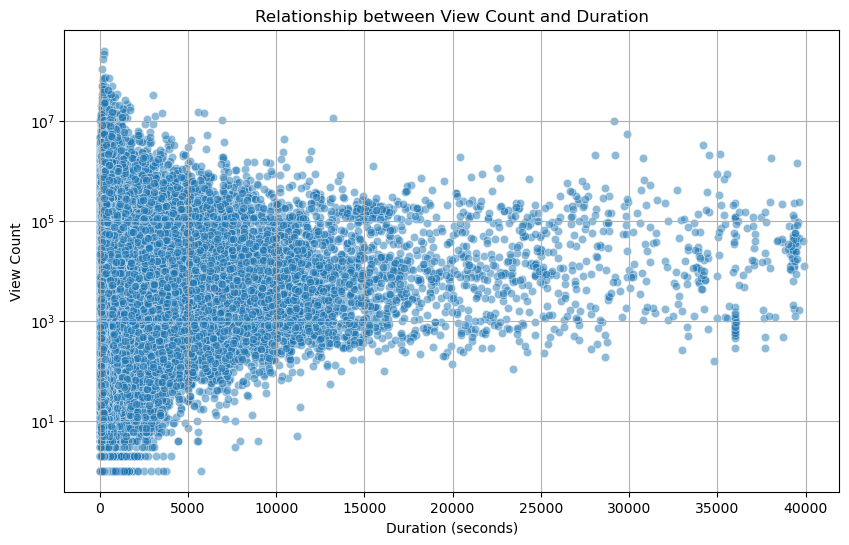

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 检查数据类型并处理任何可能的缺失值或异常值
# 去除 view_count 或 duration 为 0 的数据点（可选步骤，视数据情况而定）
filtered_df = feature_df[(feature_df['view_count'] > 0) & (feature_df['duration'] > 0) & (feature_df['duration'] < 40000)]

# 使用 Seaborn 创建散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='duration', y='view_count', alpha=0.5)
plt.title('Relationship between View Count and Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('View Count')
plt.yscale('log')  # 视情况而定，可以使用对数尺度更好地展示数据
plt.grid(True)
plt.show()


Average View Count: 62965.10


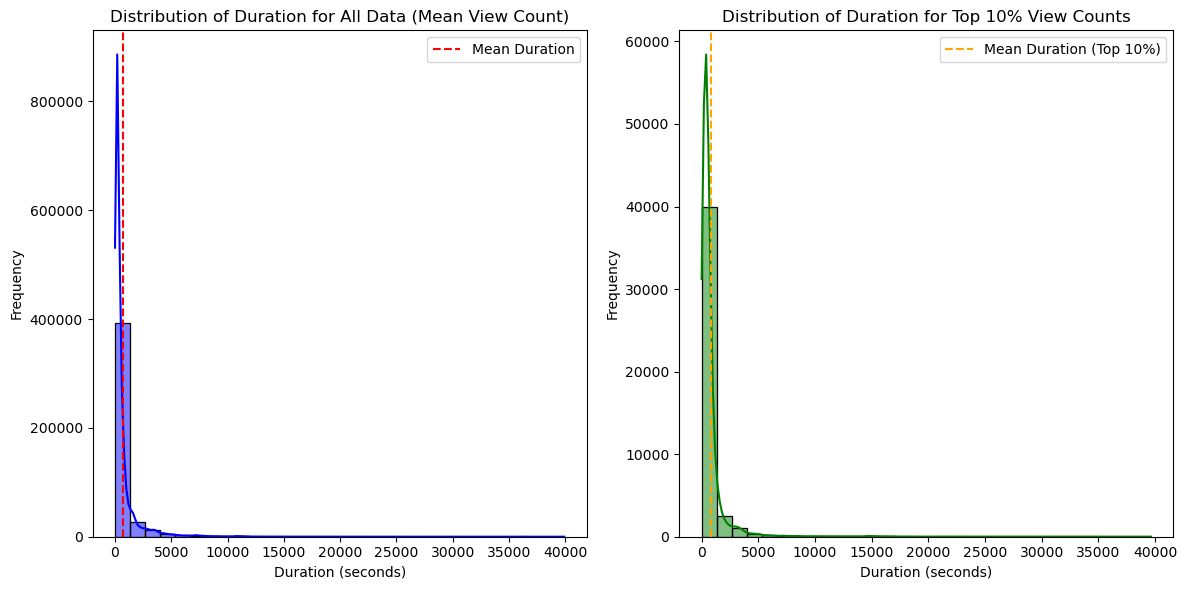

In [8]:
import numpy as np

# 计算 view_count 的平均值
average_view_count = filtered_df['view_count'].mean()
print(f"Average View Count: {average_view_count:.2f}")

# 找出 view_count 的前 10% 阈值
top_10_percent_threshold = np.percentile(filtered_df['view_count'], 90)

# 筛选前 10% 的数据
top_10_percent_df = filtered_df[filtered_df['view_count'] >= top_10_percent_threshold]

# 可视化平均 views 和前 10% 的 views 的时长分布
plt.figure(figsize=(12, 6))

# 平均 views 的时长分布
plt.subplot(1, 2, 1)
sns.histplot(data=filtered_df, x='duration', bins=30, kde=True, color='blue')
plt.title('Distribution of Duration for All Data (Mean View Count)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.axvline(filtered_df['duration'].mean(), color='red', linestyle='--', label='Mean Duration')
plt.legend()

# 前 10% views 的时长分布
plt.subplot(1, 2, 2)
sns.histplot(data=top_10_percent_df, x='duration', bins=30, kde=True, color='green')
plt.title('Distribution of Duration for Top 10% View Counts')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.axvline(top_10_percent_df['duration'].mean(), color='orange', linestyle='--', label='Mean Duration (Top 10%)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# list of conspiracy theory keywords
conspiracy_keywords = [
    "Deep State",
    "Election Fraud",
    "QAnon",
    "Wuhan Virus",
    "Vaccine Skepticism",
    "Missing Emails",
    "Biden Family Scandal",
    "Climate Change Hoax"
]

# check if a text contains any of the conspiracy
def contains_conspiracy(text, keywords):
    for keyword in keywords:
        if keyword.lower() in text.lower():
            return True
    return False


In [12]:
# Initialize list to store records with conspiracy keywords
conspiracy_records = []

# Open and read the .gz file
with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for line in f:
        data = json.loads(line)
        
        # Check if the title contains any of the conspiracy keywords
        if 'title' in data and contains_conspiracy(data['title'], conspiracy_keywords):
            conspiracy_records.append({
                'title': data['title'],
                'like_count': data.get('like_count', 0),
                'dislike_count': data.get('dislike_count', 0),
                'view_count': data.get('view_count', 0),
                'duration': data.get('duration', 0),
                'upload_date': data.get('upload_date', ''),
                'categories': data['categories'],
                'channel_id': data['channel_id']
            })

# Create DataFrame for conspiracy records
conspiracy_df = pd.DataFrame(conspiracy_records)

# Display the first few rows of the DataFrame
print(conspiracy_df.head())
print(f"find {len(conspiracy_df)} records with conspiracy keywords.")


                                               title  like_count  \
0  SerialBrain2: The Deep State's New Playbook ag...     17634.0   
1  SerialBrain2 - The NO CAVE Strategy: How Trump...     14205.0   
2  SerialBrain2: Trump’s Cabinet Meeting Poster: ...     13179.0   
3            Q: The World will KNOW the TRUTH #qanon      5477.0   
4  SerialBrain2 - Panic in DC and the Maestro’s A...      3561.0   

   dislike_count  view_count  duration          upload_date       categories  \
0          123.0    251484.0      1209  2019-03-01 00:00:00  News & Politics   
1          154.0    226306.0      1104  2019-02-05 00:00:00  News & Politics   
2          196.0    261115.0      1572  2019-01-11 00:00:00  News & Politics   
3          103.0    149132.0       762  2018-10-08 00:00:00  News & Politics   
4           43.0     87902.0       888  2018-09-26 00:00:00  News & Politics   

                 channel_id  
0  UCzFSNq-Q7QV6kBSw9zCoVXg  
1  UCzFSNq-Q7QV6kBSw9zCoVXg  
2  UCzFSNq-Q7QV6kBSw

In [ ]:

print(conspiracy_df.describe())

category_counts = conspiracy_df['categories'].value_counts()
print("\nCategory distribution for conspiracy videos:")
print(category_counts)


         like_count  dislike_count    view_count      duration
count   1870.000000    1870.000000  1.894000e+03   1894.000000
mean    1502.779679      57.968984  3.709378e+04   1296.782999
std     2815.014680     214.098071  1.166402e+05   1512.458436
min        0.000000       0.000000  1.600000e+01      2.000000
25%      133.250000       4.000000  2.335000e+03    407.500000
50%      583.000000      13.000000  1.070400e+04    897.000000
75%     1644.750000      38.000000  3.527600e+04   1644.000000
max    34703.000000    4339.000000  2.976831e+06  26647.000000

Category distribution for conspiracy videos:
categories
News & Politics          938
People & Blogs           334
Entertainment            277
Comedy                   147
Education                 82
Nonprofits & Activism     70
Science & Technology      14
Film & Animation          11
Music                      9
Autos & Vehicles           7
Travel & Events            3
Gaming                     1
Howto & Style              1

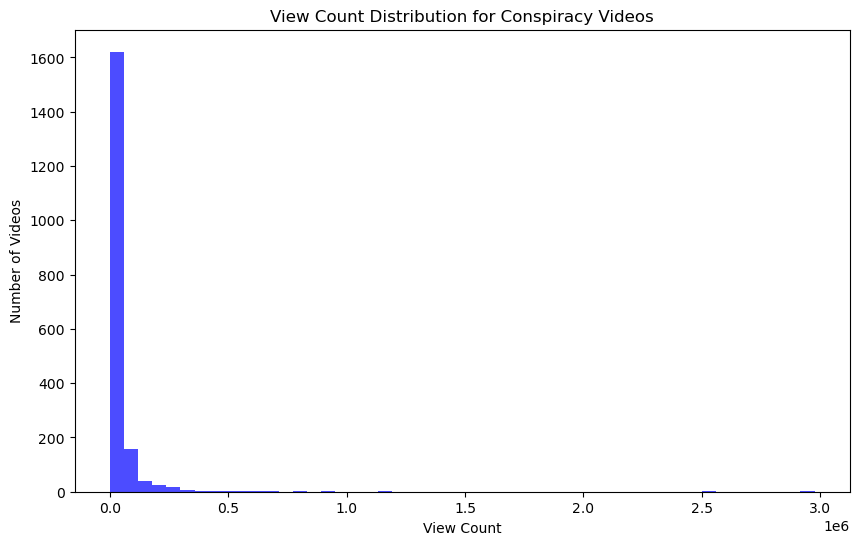

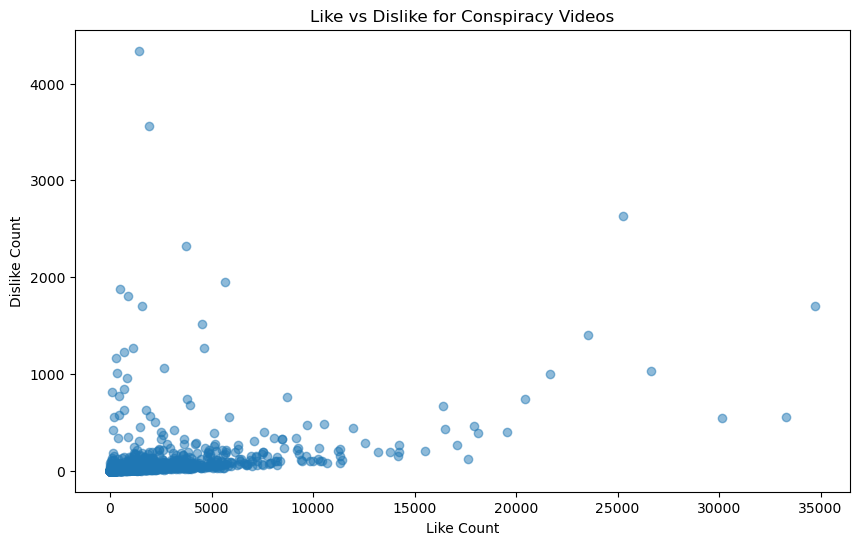

In [14]:
# View count distribution for conspiracy videos
plt.figure(figsize=(10, 6))
plt.hist(conspiracy_df['view_count'], bins=50, color='blue', alpha=0.7)
plt.xlabel('View Count')
plt.ylabel('Number of Videos')
plt.title('View Count Distribution for Conspiracy Videos')
plt.show()

# Like vs Dislike for conspiracy videos
plt.figure(figsize=(10, 6))
plt.scatter(conspiracy_df['like_count'], conspiracy_df['dislike_count'], alpha=0.5)
plt.xlabel('Like Count')
plt.ylabel('Dislike Count')
plt.title('Like vs Dislike for Conspiracy Videos')
plt.show()


In [25]:
# get non-conspiracy records
non_conspiracy_records = [data for data in feature_data if not contains_conspiracy(data.get('title', ''), conspiracy_keywords)]

# Create DataFrame for non-conspiracy records
non_conspiracy_df = pd.DataFrame(non_conspiracy_records)
pd.set_option('display.float_format', '{:,.2f}'.format)
# Display the first few rows of the DataFrame
print("\nNon-conspiracy records:")
print(conspiracy_df.describe())

print("\nNon-conspiracy records:")
print(non_conspiracy_df.describe())



Non-conspiracy records:
       like_count  dislike_count   view_count  duration  like_dislike_rate
count    1,894.00       1,894.00     1,894.00  1,894.00           1,894.00
mean     1,483.74          57.23    37,093.78  1,296.78               0.93
std      2,802.16         212.84   116,640.20  1,512.46               0.16
min          0.00           0.00        16.00      2.00               0.00
25%        124.25           3.00     2,335.00    407.50               0.95
50%        563.00          12.00    10,704.00    897.00               0.98
75%      1,622.25          38.00    35,276.00  1,644.00               0.99
max     34,703.00       4,339.00 2,976,831.00 26,647.00               1.00

Non-conspiracy records:
        like_count  dislike_count     view_count   duration
count   441,832.00     441,832.00     447,584.00 447,616.00
mean      1,138.64         118.88      62,952.07     767.20
std      10,319.61       6,911.90     787,422.43   2,071.63
min           0.00           0.00  

In [18]:
from scipy import stats

# make sure view_count is not NaN
conspiracy_view_counts = conspiracy_df['view_count'].dropna()
non_conspiracy_view_counts = non_conspiracy_df['view_count'].dropna()

# perform t-test
t_stat, p_value = stats.ttest_ind(conspiracy_view_counts, non_conspiracy_view_counts, equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

# interpret the results
if p_value < 0.05:
    print("results are significant: The view counts for conspiracy videos are significantly different from non-conspiracy videos.")
else:
    print("results are not significant: The view counts for conspiracy videos are not significantly different from non-conspiracy videos.")


T-statistic: -8.833814702584457, p-value: 1.7867394947497334e-18
results are significant: The view counts for conspiracy videos are significantly different from non-conspiracy videos.


In [19]:
# Convert like_count and dislike_count to numeric values
conspiracy_df['like_count'] = pd.to_numeric(conspiracy_df['like_count'], errors='coerce').fillna(0)
conspiracy_df['dislike_count'] = pd.to_numeric(conspiracy_df['dislike_count'], errors='coerce').fillna(0)
non_conspiracy_df['like_count'] = pd.to_numeric(non_conspiracy_df['like_count'], errors='coerce').fillna(0)
non_conspiracy_df['dislike_count'] = pd.to_numeric(non_conspiracy_df['dislike_count'], errors='coerce').fillna(0)

# Calculate like-dislike rate for each video
conspiracy_df['like_dislike_rate'] = conspiracy_df['like_count'] / (conspiracy_df['like_count'] + conspiracy_df['dislike_count']).replace(0, 1)
non_conspiracy_df['like_dislike_rate'] = non_conspiracy_df['like_count'] / (non_conspiracy_df['like_count'] + non_conspiracy_df['dislike_count']).replace(0, 1)

# Display the first few rows of the DataFrame
print(conspiracy_df[['like_count', 'dislike_count', 'like_dislike_rate']].head())
print(non_conspiracy_df[['like_count', 'dislike_count', 'like_dislike_rate']].head())


   like_count  dislike_count  like_dislike_rate
0     17634.0          123.0           0.993073
1     14205.0          154.0           0.989275
2     13179.0          196.0           0.985346
3      5477.0          103.0           0.981541
4      3561.0           43.0           0.988069
   like_count  dislike_count  like_dislike_rate
0        47.0            6.0           0.886792
1        52.0            8.0           0.866667
2        26.0            4.0           0.866667
3        25.0            8.0           0.757576
4        43.0           24.0           0.641791


In [23]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # visualize like-dislike rate distribution
# plt.figure(figsize=(12, 6))
# sns.histplot(conspiracy_df['like_count'], color='blue', label='Conspiracy Videos', kde=True, bins=50)
# sns.histplot(non_conspiracy_df['like_count'], color='orange', label='Non-Conspiracy Videos', kde=True, bins=50)
# plt.xlabel('Like Count')
# plt.ylabel('Number of Videos')
# plt.title('Like Count Distribution: Conspiracy vs Non-Conspiracy Videos')
# plt.legend()
# plt.show()

# # visualize dislike_count distribution
# plt.figure(figsize=(12, 6))
# sns.histplot(conspiracy_df['dislike_count'], color='blue', label='Conspiracy Videos', kde=True, bins=50)
# sns.histplot(non_conspiracy_df['dislike_count'], color='orange', label='Non-Conspiracy Videos', kde=True, bins=50)
# plt.xlabel('Dislike Count')
# plt.ylabel('Number of Videos')
# plt.title('Dislike Count Distribution: Conspiracy vs Non-Conspiracy Videos')
# plt.legend()
# plt.show()


In [21]:
from scipy import stats

# T test - Like Count
t_stat_like, p_value_like = stats.ttest_ind(conspiracy_df['like_count'], non_conspiracy_df['like_count'], equal_var=False)
print(f"Like Count - T-statistic: {t_stat_like}, p-value: {p_value_like}")

# T test - Dislike Count
t_stat_dislike, p_value_dislike = stats.ttest_ind(conspiracy_df['dislike_count'], non_conspiracy_df['dislike_count'], equal_var=False)
print(f"Dislike Count - T-statistic: {t_stat_dislike}, p-value: {p_value_dislike}")

# T test - Like-Dislike Rate
t_stat_rate, p_value_rate = stats.ttest_ind(conspiracy_df['like_dislike_rate'], non_conspiracy_df['like_dislike_rate'], equal_var=False)
print(f"Like-Dislike Rate - T-statistic: {t_stat_rate}, p-value: {p_value_rate}")


Like Count - T-statistic: 5.436301796399364, p-value: 6.06749444652462e-08
Dislike Count - T-statistic: -5.286539600572095, p-value: 1.2516258047004212e-07
Like-Dislike Rate - T-statistic: 36.066040051917824, p-value: 2.3896318168555067e-218


In [22]:
if p_value_like < 0.05:
    print("results are significant: The like counts for conspiracy videos are significantly different from non-conspiracy videos.")
else:
    print("results are not significant: The like counts for conspiracy videos are not significantly different from non-conspiracy videos.")
if p_value_dislike < 0.05:
    print("results are significant: The dislike counts for conspiracy videos are significantly different from non-conspiracy videos.")
else:
    print("results are not significant: The dislike counts for conspiracy videos are not significantly different from non-conspiracy videos.")
if p_value_rate < 0.05:
    print("results are significant: The like-dislike rates for conspiracy videos are significantly different from non-conspiracy videos.")
else:
    print("results are not significant: The like-dislike rates for conspiracy videos are not significantly different from non-conspiracy videos.")

results are significant: The like counts for conspiracy videos are significantly different from non-conspiracy videos.
results are significant: The dislike counts for conspiracy videos are significantly different from non-conspiracy videos.
results are significant: The like-dislike rates for conspiracy videos are significantly different from non-conspiracy videos.


In [31]:
# Group conspiracy-related videos by channel and sum their view counts
top_conspiracy_channels_by_views = (
    conspiracy_df.groupby('channel_id')['view_count']
    .sum()
    .reset_index()
    .rename(columns={'view_count': 'total_views'})
    .sort_values(by='total_views', ascending=False)
)

# Calculate total views for all conspiracy-related videos
total_conspiracy_views = top_conspiracy_channels_by_views['total_views'].sum()

# Calculate market share based on view counts
top_conspiracy_channels_by_views['market_share'] = (top_conspiracy_channels_by_views['total_views'] / total_conspiracy_views) * 100

# Display the top 10 channels by total views and their market share
print("\nTop channels producing conspiracy-related videos (by views):")
print(top_conspiracy_channels_by_views.head(10))



Top channels producing conspiracy-related videos (by views):
                   channel_id   total_views  market_share
207  UCXIJgqnII2ZOINSWNOGFThA 10,187,879.00         14.50
150  UCLoNQH9RCndfUGOb2f7E1Ew  3,609,210.00          5.14
146  UCKpH2KFEngc9Csp2i71znYA  3,510,991.00          5.00
359  UCxC2RlwWGHnwXanvHNBmw2w  3,274,123.00          4.66
27   UC2nQYGjfe9I_tgWpqgJorUg  3,004,271.00          4.28
81   UCB1o7_gbFp2PLsamWxFenBg  2,855,376.00          4.06
133  UCJ-qLG1bdWVrHM-Hu2W73CQ  2,747,267.00          3.91
158  UCMtFAi84ehTSYSE9XoHefig  2,536,625.00          3.61
190  UCSio3E7kYvPeHKhfuYZWriA  2,267,062.00          3.23
329  UCt4FOn_sTZkEWpADBAWrQ3g  1,575,071.00          2.24


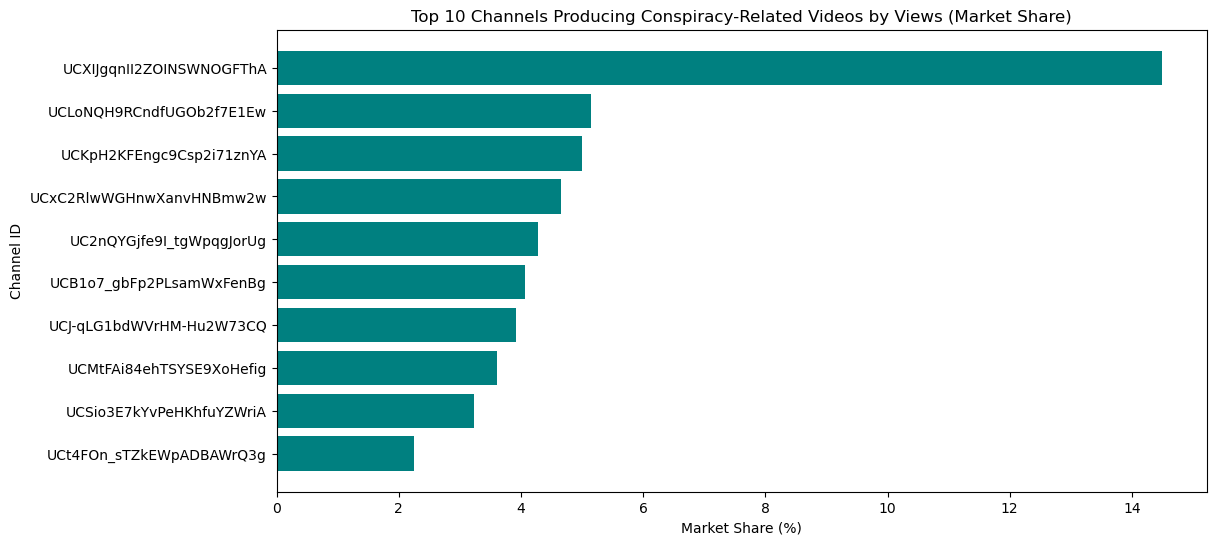

In [32]:
import matplotlib.pyplot as plt

# Plotting the top 10 channels' market share based on views
plt.figure(figsize=(12, 6))
top_10_channels_by_views = top_conspiracy_channels_by_views.head(10)
plt.barh(top_10_channels_by_views['channel_id'], top_10_channels_by_views['market_share'], color='teal')
plt.xlabel('Market Share (%)')
plt.ylabel('Channel ID')
plt.title('Top 10 Channels Producing Conspiracy-Related Videos by Views (Market Share)')
plt.gca().invert_yaxis()  # Invert y-axis to show the largest at the top
plt.show()


In [42]:
# Extract top 10 channels by views
top_10_channels = top_conspiracy_channels_by_views.head(10)['channel_id'].tolist()

# Filter the original dataset for all videos produced by these top 10 channels
all_videos_top_channels = conspiracy_df[conspiracy_df['channel_id'].isin(top_10_channels)]


In [44]:
print(feature_df.columns)


Index(['channel_id', 'like_count', 'dislike_count', 'view_count', 'duration',
       'upload_date'],
      dtype='object')


In [50]:
# Check the columns of total_videos_by_channel
print("\nColumns in total_videos_by_channel:")
print(total_videos_by_channel.columns)

# Check the first few rows
print("\nSample data from total_videos_by_channel:")
print(total_videos_by_channel.head())

# Check the columns of conspiracy_videos_by_channel
print("\nColumns in conspiracy_videos_by_channel:")
print(conspiracy_videos_by_channel.columns)

# Check the first few rows
print("\nSample data from conspiracy_videos_by_channel:")
print(conspiracy_videos_by_channel.head())



Columns in total_videos_by_channel:
Index(['total_videos', 'count'], dtype='object')

Sample data from total_videos_by_channel:
               total_videos  count
0  UCXIJgqnII2ZOINSWNOGFThA  15533
1  UCLoNQH9RCndfUGOb2f7E1Ew  15181
2  UCMtFAi84ehTSYSE9XoHefig   1009
3  UCB1o7_gbFp2PLsamWxFenBg    914
4  UCKpH2KFEngc9Csp2i71znYA    309

Columns in conspiracy_videos_by_channel:
Index(['channel_id', 'conspiracy_videos'], dtype='object')

Sample data from conspiracy_videos_by_channel:
                 channel_id  conspiracy_videos
0  UC2nQYGjfe9I_tgWpqgJorUg                 18
1  UCB1o7_gbFp2PLsamWxFenBg                 61
2  UCJ-qLG1bdWVrHM-Hu2W73CQ                 29
3  UCKpH2KFEngc9Csp2i71znYA                 64
4  UCLoNQH9RCndfUGOb2f7E1Ew                113


In [52]:
# Check if DataFrames are empty
print("\ntotal_videos_by_channel is empty:", total_videos_by_channel.empty)
print("\nconspiracy_videos_by_channel is empty:", conspiracy_videos_by_channel.empty)



total_videos_by_channel is empty: False

conspiracy_videos_by_channel is empty: False


In [53]:
# Verify feature_df contains 'channel_id'
print("\nColumns in feature_df:")
print(feature_df.columns)

# Check unique 'channel_id' values
print("\nUnique 'channel_id' values in feature_df:")
print(feature_df['channel_id'].unique())

# Verify that 'conspiracy_df' contains 'channel_id' as expected
print("\nColumns in conspiracy_df:")
print(conspiracy_df.columns)

# Check unique 'channel_id' values in conspiracy_df
print("\nUnique 'channel_id' values in conspiracy_df:")
print(conspiracy_df['channel_id'].unique())



Columns in feature_df:
Index(['channel_id', 'like_count', 'dislike_count', 'view_count', 'duration',
       'upload_date'],
      dtype='object')

Unique 'channel_id' values in feature_df:
['UCzWm1-4XF7AHxVUTkHCM1uw' 'UCzWQYUVCpZqtN93H8RR44Qw'
 'UCzVn5MukMsABSfWktHaw-qw' ... 'UCrwTSngSR2I4vs0hIY_PU1Q'
 'UCrwIl9MrZ8S4DOm06DOvZjA' 'UCrwE8kVqtIUVUzKui2WVpuQ']

Columns in conspiracy_df:
Index(['title', 'like_count', 'dislike_count', 'view_count', 'duration',
       'upload_date', 'categories', 'channel_id', 'like_dislike_rate'],
      dtype='object')

Unique 'channel_id' values in conspiracy_df:
['UCzFSNq-Q7QV6kBSw9zCoVXg' 'UCrmm_7RDZJeQzq2-wvmjueg'
 'UCraPqmcydVU-tWsAM_vpUvg' 'UCrQ-wHKVi0JDWjQGcuoYnew'
 'UCqlYzSgsh5jdtWYfVIBoTDw' 'UCqkYKx436lTkeki_9eNmv1Q'
 'UCqUM8cWmOkYuPElC9GbbDUA' 'UCqRScKbESN0th-TdlmaQ6oQ'
 'UCqPKOi9bksw0pNS0KsJ9tDQ' 'UCqOdHprLVQnHhE8FmIY3Yzg'
 'UCqNfXxfww4ATBZsbv64nwRg' 'UCq-PzlLuePFoR_XRzwQZGyA'
 'UCpwjYJfgn_Q86MPV2OU264w' 'UCpwXjOAwWDuWlmA2gTjjBwg'
 'UCpimAnNpH_JQ

In [54]:
total_videos_by_channel = (
    all_videos_for_top_channels['channel_id']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'channel_id', 'channel_id': 'total_videos'})
)
print("\nTotal Videos by Channel DataFrame:")
print(total_videos_by_channel.head())



Total Videos by Channel DataFrame:
               total_videos  count
0  UCXIJgqnII2ZOINSWNOGFThA  15533
1  UCLoNQH9RCndfUGOb2f7E1Ew  15181
2  UCMtFAi84ehTSYSE9XoHefig   1009
3  UCB1o7_gbFp2PLsamWxFenBg    914
4  UCKpH2KFEngc9Csp2i71znYA    309


In [55]:
conspiracy_videos_by_channel = (
    conspiracy_df[conspiracy_df['channel_id'].isin(top_10_channels)]
    .groupby('channel_id')
    .size()
    .reset_index(name='conspiracy_videos')
)
print("\nConspiracy Videos by Channel DataFrame:")
print(conspiracy_videos_by_channel.head())



Conspiracy Videos by Channel DataFrame:
                 channel_id  conspiracy_videos
0  UC2nQYGjfe9I_tgWpqgJorUg                 18
1  UCB1o7_gbFp2PLsamWxFenBg                 61
2  UCJ-qLG1bdWVrHM-Hu2W73CQ                 29
3  UCKpH2KFEngc9Csp2i71znYA                 64
4  UCLoNQH9RCndfUGOb2f7E1Ew                113


In [49]:
# If all_videos_top_channels is only capturing a subset, load all videos for the channels
# Assuming df is your original dataset containing all videos, not just conspiracy-related ones
# Assuming top_10_channels is already defined and contains the IDs of the top 10 channels
# Convert 'channel_id' to string type for consistent comparisons
feature_df['channel_id'] = feature_df['channel_id'].astype(str)

# Ensure 'top_10_channels' is a list of strings
top_10_channels = [str(ch) for ch in top_10_channels]

# Filter DataFrame
all_videos_for_top_channels = feature_df[feature_df['channel_id'].isin(top_10_channels)]


# Count total videos for these channels
total_videos_by_channel = (
    all_videos_for_top_channels['channel_id']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'channel_id', 'channel_id': 'total_videos'})
)


# Count conspiracy-related videos for these channels (assuming conspiracy_df is correctly filtered)
conspiracy_videos_by_channel = (
    conspiracy_df[conspiracy_df['channel_id'].isin(top_10_channels)]
    .groupby('channel_id')
    .size()
    .reset_index(name='conspiracy_videos')
)

# Merge and calculate the rate
# Convert 'channel_id' to string to ensure consistent merging
total_videos_by_channel['channel_id'] = total_videos_by_channel['channel_id'].astype(str)
conspiracy_videos_by_channel['channel_id'] = conspiracy_videos_by_channel['channel_id'].astype(str)
# Convert columns to numeric, coercing errors to NaN
total_videos_by_channel['channel_id'] = total_videos_by_channel['channel_id'].astype(str)
conspiracy_videos_by_channel['channel_id'] = conspiracy_videos_by_channel['channel_id'].astype(str)

# Merge the DataFrames
merged_data = pd.merge(total_videos_by_channel, conspiracy_videos_by_channel, on='channel_id', how='left').fillna(0)

# Ensure numeric types for calculations
merged_data['total_videos'] = pd.to_numeric(merged_data['total_videos'], errors='coerce')
merged_data['conspiracy_videos'] = pd.to_numeric(merged_data['conspiracy_videos'], errors='coerce')

# Fill NaN values if needed
merged_data.fillna(0, inplace=True)

# Calculate the conspiracy rate
merged_data['conspiracy_rate'] = (merged_data['conspiracy_videos'] / merged_data['total_videos']) * 100

# Display the results
print("\nTop 10 Channels and their Conspiracy Video Rate:")
# print(merged_data)


KeyError: 'channel_id'